In [ ]:
from IPython.core.display import display, HTML

def show_image(url, width=1600):
    display(HTML(f"<img src='{url}' width={width}>"))

show_image('https://i.imgur.com/XLD0c0o.png')

# 1. Problema a resolver
El problema abordado es la falta de comprensión estructurada sobre cómo los usuarios perciben productos o servicios. Las empresas reciben miles de comentarios, pero no cuentan con herramientas efectivas para analizarlos emocionalmente.


##  2. Diccionario de datos
El dataset 'ComentarioTikTok' contiene información de **+1500 comentarios** del histórico naufragio. A continuación, se describen las variables disponibles:

| Variable            | Tipo       | Descripción |
|---------------------|------------|-------------|
| `user`              | Object    | Nombre de usuario |
| `user_id`           | int    | ID del usuario |
| `text`              | object | Comentario realizado por el usuario |
| `like`              | int  | Cantidad de likes en un comentario |
| `reply_count`       | int    | Cantidad de respuestas en un comentario |
| `timestamp`         | object  | Codigo de la fecha |
| `fecha_legible`     | object  | fecha del comentario realizado |




## 3. Exploración inicial
Cargar el dataset desde Google Drive, se habilitan los permisos
Ademas, se importa las librerias pandas para el analisis del dataset

In [9]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [10]:
import pandas as pd


In [11]:
!ls '/content/drive/MyDrive'



 ARREGLAR
'Carpeta sin título'
'CICLO 1  Video entrevista '
'Colab Notebooks'
 COMENTARIOTIKTOK-SELECCION.csv
'Copia de Clothe Cycle.gdoc'
'Diagrama sin título (1).drawio'
'Diagrama sin título.drawio'
'Documento sin título (10).gdoc'
'Documento sin título (11).gdoc'
'Documento sin título (12).gdoc'
'Documento sin título (13).gdoc'
'Documento sin título (14).gdoc'
'Documento sin título (15).gdoc'
'Documento sin título (16).gdoc'
'Documento sin título (17).gdoc'
'Documento sin título (18).gdoc'
'Documento sin título (19).gdoc'
'Documento sin título (1).gdoc'
'Documento sin título (20).gdoc'
'Documento sin título (21).gdoc'
'Documento sin título (22).gdoc'
'Documento sin título (2).gdoc'
'Documento sin título (3).gdoc'
'Documento sin título (4).gdoc'
'Documento sin título (5).gdoc'
'Documento sin título (6).gdoc'
'Documento sin título (7).gdoc'
'Documento sin título (8).gdoc'
'Documento sin título (9).gdoc'
'Documento sin título.gdoc'
'ECONOMIA CIRCULAR ROPA.gdoc

In [12]:
ruta = '/content/drive/MyDrive/tiktok_comments_7473610587881114885_20250430_223511.csv'
df = pd.read_csv(ruta)



In [ ]:

print(df.shape)
df.head()

(1199, 5)


,user,comment,time,likes,reply_count
0,Joel Equiño Espinoza.,le gana sauvage dior ufff perfumaso .,2025-02-21 10:25:01,296,28
1,Klaus Heinz,Si lo dice Flavia laos prefiero usar Yanbal 😅😅😅,2025-02-21 19:53:11,400,15
2,jozahel,Me dejan el precio ? No me dejen su Wsp que no...,2025-02-21 08:29:51,337,38
3,Pilar Acha Mendez,Cuál es su precio?,2025-02-21 20:20:06,4,11
4,Bas 🫀,"El olor no perdura, pero si huele muy rico, mu...",2025-02-21 10:56:35,15,23


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1769 entries, 0 to 1768
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user           1769 non-null   object
 1   user_id        1769 non-null   int64 
 2   text           1769 non-null   object
 3   likes          1769 non-null   int64 
 4   reply_count    1769 non-null   int64 
 5   timestamp      1769 non-null   int64 
 6   fecha_legible  1769 non-null   object
dtypes: int64(4), object(3)
memory usage: 96.9+ KB


# Instalación de librerías para procesamiento de texto
En este paso se instalan las herramientas principales para el procesamiento de texto en lenguaje natural:


*   spaCy: Para lematización, tokenización y análisis
*   deep-translator: Para traducir los comentarios a español si están en otro idioma.




In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
!pip install -q deep-translator


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.7 MB/s eta 0:00:00


# 3. Análisis exploratorio de datos **📊**

Calcular la longitud de los comentarios

In [ ]:
df['length'] = df['comment'].astype(str).apply(len)

Estadísticas generales de variables numéricas

In [ ]:
df[['likes', 'reply_count', 'length']].describe()

,likes,reply_count,length
count,1199.000000,1199.000000,1199.000000
mean,1.798999,0.211009,16.071726
std,28.523700,1.904571,20.979635
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,6.000000
50%,0.000000,0.000000,7.000000
75%,0.000000,0.000000,18.000000
max,771.000000,38.000000,183.000000


Histograma de longitud de comentarios

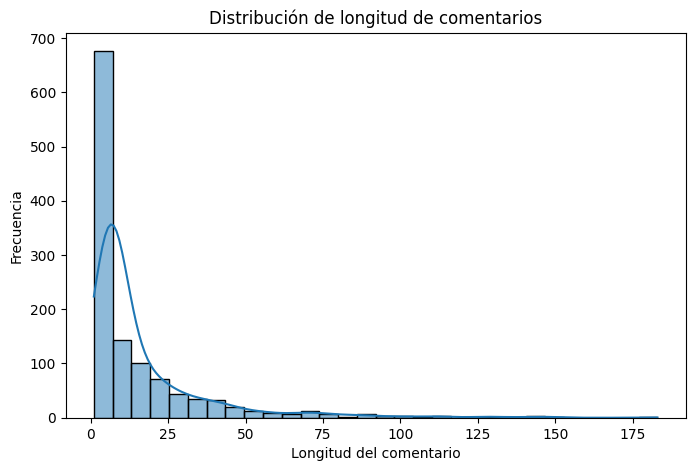

In [ ]:
# Visualización de distribución de longitud
plt.figure(figsize=(8,5))
sns.histplot(df['length'], bins=30, kde=True)
plt.title("Distribución de longitud de comentarios")
plt.xlabel("Longitud del comentario")
plt.ylabel("Frecuencia")
plt.show()

El histograma muestra que la mayoría de los comentarios tienen entre 10 y 60 caracteres. Sin embargo, hay una cola larga a la derecha, lo que confirma la presencia de comentarios inusualmente largos.

Boxplot de likes y respuestas (outliers)

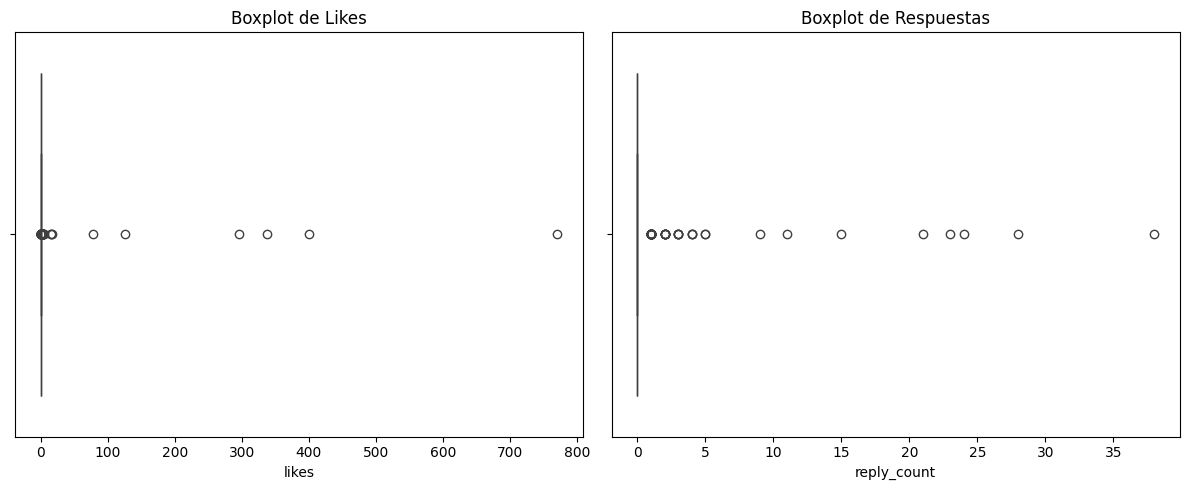

In [13]:
# Outliers en likes y respuestas
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x=df['likes'])
plt.title("Boxplot de Likes")

plt.subplot(1,2,2)
sns.boxplot(x=df['reply_count'])
plt.title("Boxplot de Respuestas")

plt.tight_layout()
plt.show()




Al igual que en los likes, la mayoría de los comentarios tienen entre 0 y 5 respuestas.

Hay varios outliers con más de 10, 20 o hasta 35 respuestas.

La caja también es pequeña y pegada al eje, lo que indica alta concentración en valores bajos.

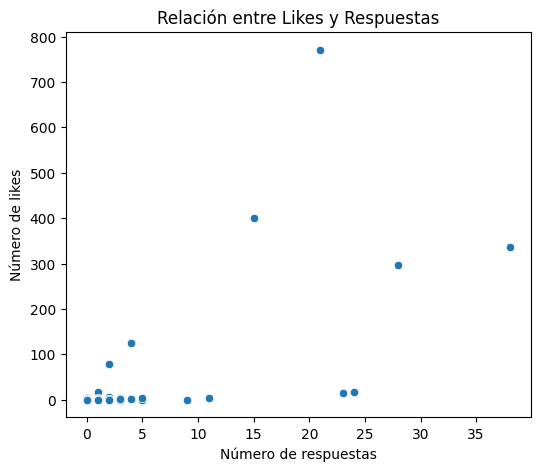

In [ ]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='reply_count', y='likes', data=df)
plt.title("Relación entre Likes y Respuestas")
plt.xlabel("Número de respuestas")
plt.ylabel("Número de likes")
plt.show()


Distribución temporal de comentarios

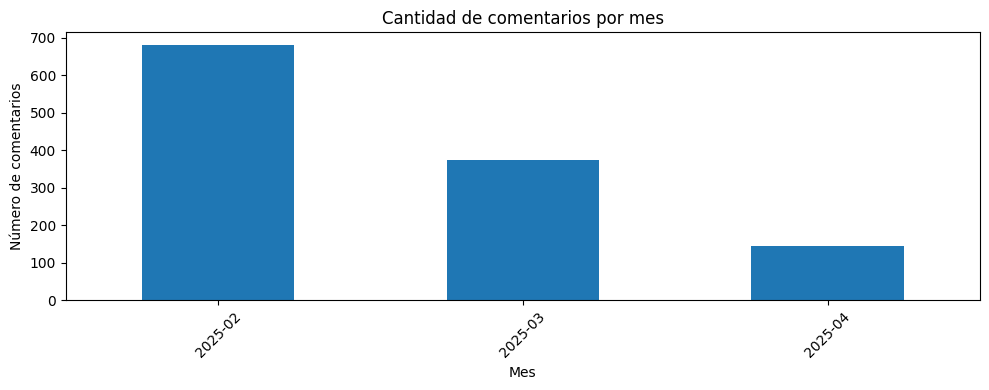

In [ ]:
df['time'] = pd.to_datetime(df['time'], errors='coerce')

df['mes'] = df['time'].dt.to_period('M').astype(str)

df_por_mes = df.groupby('mes').size()

plt.figure(figsize=(10,4))
df_por_mes.plot(kind='bar')
plt.title("Cantidad de comentarios por mes")
plt.xlabel("Mes")
plt.ylabel("Número de comentarios")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Revisión de valores nulos

Gráfico de dispersión Likes vs Respuestas

## 4. Limpieza de datos


*   Traducción automática de comentarios al español
*   Limpieza básica del texto
*   Tokenización, lematización y limpieza de palabras vacías con spaCy
*   Aplicar procesamiento NLP al texto limpio
*   Eliminación columnas irrelevantes



#4.1 Traducción automática de comentarios al español
Esta función detecta automáticamente el idioma del texto y lo traduce al español utilizando Google Translate.


In [ ]:
from deep_translator import GoogleTranslator

def traducir_a_espanol(texto):
    try:
        return GoogleTranslator(source='auto', target='es').translate(texto)
    except:
        return texto


In [ ]:
# Traducir los comentarios al español
df['texto_es'] = df['text'].astype(str).apply(traducir_a_espanol)
df.head()

,user,user_id,text,likes,reply_count,timestamp,fecha_legible,texto_es
0,skyevil6,6903611670226437121,Nadie va agradecer a Zambrano por ese gran pas...,4912,37,1728708544,2024-10-11 23:49:04,Nadie va agradecer a Zambrano por ese gran pas...
1,YWH 🐐,6977605408710394885,Alianza Lima y la U le ganaron al liverpool y ...,3477,37,1728721058,2024-10-12 03:17:38,Alianza Lima y la U le ganaron al liverpool y ...
2,Joseca_08,6836139685942576134,Para mi sonne fue el sacrificado del partido. ...,3629,22,1728745821,2024-10-12 10:10:21,Para mi sonne fue el sacrificado del partido. ...
3,Ronal Ramos Sanchez,6786196328880817157,"Zambrano fue un ""crack "" y es el tipo de jugad...",1235,10,1728738245,2024-10-12 08:04:05,"Zambrano fue un ""crack "" y es el tipo de jugad..."
4,♡Lu!$ @LF○N$●♧,6980168612896048134,hablan de quispe pero el pase para quispe de q...,1252,40,1728733689,2024-10-12 06:48:09,hablan de quispe pero el pase para quispe de q...


# 4.2 Limpieza básica del texto


Se realiza una limpieza para eliminar elementos no útiles como URLs, menciones, hashtags, símbolos y se convierten los textos a minúsculas.Es un paso clave para dejar los comentarios listos para análisis.

In [ ]:
import re

def limpiar_texto(texto):
    texto = re.sub(r"http\S+", "", texto)
    texto = re.sub(r"@\w+", "", texto)
    texto = re.sub(r"#\w+", "", texto)
    texto = re.sub(r"[^A-Za-zÁ-ÿñÑ\s]", "", texto)
    texto = texto.lower().strip()
    return texto

df['texto_limpio'] = df['texto_es'].astype(str).apply(limpiar_texto)

df


,user,user_id,text,likes,reply_count,timestamp,fecha_legible,texto_es,texto_limpio
0,skyevil6,6903611670226437121,Nadie va agradecer a Zambrano por ese gran pas...,4912,37,1728708544,2024-10-11 23:49:04,Nadie va agradecer a Zambrano por ese gran pas...,nadie va agradecer a zambrano por ese gran pas...
1,YWH 🐐,6977605408710394885,Alianza Lima y la U le ganaron al liverpool y ...,3477,37,1728721058,2024-10-12 03:17:38,Alianza Lima y la U le ganaron al liverpool y ...,alianza lima y la u le ganaron al liverpool y ...
2,Joseca_08,6836139685942576134,Para mi sonne fue el sacrificado del partido. ...,3629,22,1728745821,2024-10-12 10:10:21,Para mi sonne fue el sacrificado del partido. ...,para mi sonne fue el sacrificado del partido j...
3,Ronal Ramos Sanchez,6786196328880817157,"Zambrano fue un ""crack "" y es el tipo de jugad...",1235,10,1728738245,2024-10-12 08:04:05,"Zambrano fue un ""crack "" y es el tipo de jugad...",zambrano fue un crack y es el tipo de jugador...
4,♡Lu!$ @LF○N$●♧,6980168612896048134,hablan de quispe pero el pase para quispe de q...,1252,40,1728733689,2024-10-12 06:48:09,hablan de quispe pero el pase para quispe de q...,hablan de quispe pero el pase para quispe de q...
...,...,...,...,...,...,...,...,...,...
1764,DADDY.JARA the_💛🌽,7190494677957837829,era hoy Ramón,0,0,1728708231,2024-10-11 23:43:51,era hoy Ramón,era hoy ramón
1765,noriegaa_6,6659074731578802181,❤️❤️,0,0,1728707867,2024-10-11 23:37:47,None,none
1766,pasión x la bicolor 🇵🇪⚽💪,7105726994259657734,la casa se respeta 💪🇵🇪🇵🇪🇵🇪😭,0,0,1728707828,2024-10-11 23:37:08,la casa se respeta 💪🇵🇪🇵🇪🇵🇪😭,la casa se respeta
1767,usuario,6885896340833780737,era hoy ramon,0,0,1728707349,2024-10-11 23:29:09,era hoy ramon,era hoy ramon


# 4.3 Tokenización, lematización y limpieza de palabras vacías con spaCy

spaCy se utiliza para descomponer el texto en palabras significativas (tokens), eliminar palabras vacías (stopwords) y obtener la forma base (lema) de cada palabra.



In [ ]:
import spacy

nlp_es = spacy.load("es_core_news_sm")

def procesar_con_spacy(texto, nlp_model):
    doc = nlp_model(texto)
    tokens_limpios = [
        token.lemma_ for token in doc
        if not token.is_stop and not token.is_punct and len(token.text) > 2
    ]
    return " ".join(tokens_limpios)


# 4.4 Aplicar procesamiento NLP al texto limpio
Ahora se aplica spaCy al texto ya limpio para obtener una versión optimizada del contenido textual.

In [ ]:
df['texto_procesado'] = df['texto_limpio'].apply(lambda x: procesar_con_spacy(x, nlp_es))

df

,user,user_id,text,likes,reply_count,timestamp,fecha_legible,texto_es,texto_limpio,texto_procesado
0,skyevil6,6903611670226437121,Nadie va agradecer a Zambrano por ese gran pas...,4912,37,1728708544,2024-10-11 23:49:04,Nadie va agradecer a Zambrano por ese gran pas...,nadie va agradecer a zambrano por ese gran pas...,agradecer zambrano pase quispe centrar araujo ...
1,YWH 🐐,6977605408710394885,Alianza Lima y la U le ganaron al liverpool y ...,3477,37,1728721058,2024-10-12 03:17:38,Alianza Lima y la U le ganaron al liverpool y ...,alianza lima y la u le ganaron al liverpool y ...,alianza lima ganar liverpool real madrid
2,Joseca_08,6836139685942576134,Para mi sonne fue el sacrificado del partido. ...,3629,22,1728745821,2024-10-12 10:10:21,Para mi sonne fue el sacrificado del partido. ...,para mi sonne fue el sacrificado del partido j...,sonne sacrificado partido jugar lateral centra...
3,Ronal Ramos Sanchez,6786196328880817157,"Zambrano fue un ""crack "" y es el tipo de jugad...",1235,10,1728738245,2024-10-12 08:04:05,"Zambrano fue un ""crack "" y es el tipo de jugad...",zambrano fue un crack y es el tipo de jugador...,zambrano crack tipo jugador hacer falta
4,♡Lu!$ @LF○N$●♧,6980168612896048134,hablan de quispe pero el pase para quispe de q...,1252,40,1728733689,2024-10-12 06:48:09,hablan de quispe pero el pase para quispe de q...,hablan de quispe pero el pase para quispe de q...,quispe pase quispe león zambrano pase pie quispe
...,...,...,...,...,...,...,...,...,...,...
1764,DADDY.JARA the_💛🌽,7190494677957837829,era hoy Ramón,0,0,1728708231,2024-10-11 23:43:51,era hoy Ramón,era hoy ramón,ramón
1765,noriegaa_6,6659074731578802181,❤️❤️,0,0,1728707867,2024-10-11 23:37:47,None,none,none
1766,pasión x la bicolor 🇵🇪⚽💪,7105726994259657734,la casa se respeta 💪🇵🇪🇵🇪🇵🇪😭,0,0,1728707828,2024-10-11 23:37:08,la casa se respeta 💪🇵🇪🇵🇪🇵🇪😭,la casa se respeta,casa respetar
1767,usuario,6885896340833780737,era hoy ramon,0,0,1728707349,2024-10-11 23:29:09,era hoy ramon,era hoy ramon,ramon


# 4.5 Eliminación columnas irrelevantes
Para facilitar el análisis posterior, se eliminan columnas que no aportan valor directo al análisis textual.

In [ ]:
columnas_a_eliminar = ['user_id', 'timestamp', 'text']
df.drop(columns=columnas_a_eliminar, inplace=True, errors='ignore')

df

,likes,reply_count,fecha_legible,texto_es,texto_limpio,texto_procesado
0,4912,37,2024-10-11 23:49:04,Nadie va agradecer a Zambrano por ese gran pas...,nadie va agradecer a zambrano por ese gran pas...,agradecer zambrano pase quispe centrar araujo ...
1,3477,37,2024-10-12 03:17:38,Alianza Lima y la U le ganaron al liverpool y ...,alianza lima y la u le ganaron al liverpool y ...,alianza lima ganar liverpool real madrid
2,3629,22,2024-10-12 10:10:21,Para mi sonne fue el sacrificado del partido. ...,para mi sonne fue el sacrificado del partido j...,sonne sacrificado partido jugar lateral centra...
3,1235,10,2024-10-12 08:04:05,"Zambrano fue un ""crack "" y es el tipo de jugad...",zambrano fue un crack y es el tipo de jugador...,zambrano crack tipo jugador hacer falta
4,1252,40,2024-10-12 06:48:09,hablan de quispe pero el pase para quispe de q...,hablan de quispe pero el pase para quispe de q...,quispe pase quispe león zambrano pase pie quispe
...,...,...,...,...,...,...
1764,0,0,2024-10-11 23:43:51,era hoy Ramón,era hoy ramón,ramón
1765,0,0,2024-10-11 23:37:47,None,none,none
1766,0,0,2024-10-11 23:37:08,la casa se respeta 💪🇵🇪🇵🇪🇵🇪😭,la casa se respeta,casa respetar
1767,0,0,2024-10-11 23:29:09,era hoy ramon,era hoy ramon,ramon


# Visualización del dataset

Finalmente se muestra una muestra aleatoria de los comentarios ya procesados, junto con su número de likes y respuestas.

In [ ]:
df[['texto_procesado', 'likes', 'reply_count']].sample(20)


,texto_procesado,likes,reply_count
1325,,0,0
360,none,0,0
41,guerrero carrillo advinculo,51,7
511,buenasoooo,0,0
1748,none,0,0
1039,jugador tirado obtruccoon,0,0
297,perú clasificado gritar gol mundial porq tierr...,1,0
909,aguante peru cerrar boca uruguayo preciar,0,0
169,suelo despareceír gol,2,0
1764,ramón,0,0


# 4.6 Eliminación de textos vacíos
Aunque ya se han limpiado los textos, es posible que queden valores "nulos disfrazados" como cadenas vacías, espacios o valores mal parseados.

In [ ]:
# Reemplazar textos no informativos con NaN de forma segura
df['texto_procesado'] = df['texto_procesado'].replace(['', ' ', 'nan', 'None', 'none', None], pd.NA)

# Eliminar filas con texto procesado vacío o no válido
df.dropna(subset=['texto_procesado'], inplace=True)

# Reiniciar índice después de limpiar
df.reset_index(drop=True, inplace=True)



In [ ]:
df[['texto_procesado', 'likes', 'reply_count']].sample(20)

,texto_procesado,likes,reply_count
1088,decir hablar franz gol,0,0
786,sorry conche medre francés fino,0,0
43,fútbol peruano elegancia máximo explendor,70,1
75,sufra tranquilo doma,0,1
577,sonne míralo grito,0,0
1269,ganar paolo,0,0
820,peru meze,0,0
797,brasil venir goleada,0,0
420,trío perfecto gol impresionante,0,1
1347,merecer peruano levantars yo,0,0


Eliminamos las columnas temporales

In [ ]:
columnas_a_eliminar = ['texto_es', 'texto_limpio']
df.drop(columns=columnas_a_eliminar, inplace=True, errors='ignore')


print(df.shape)
df

(1132, 4)


,likes,reply_count,fecha_legible,texto_procesado
0,4912,37,2024-10-11 23:49:04,agradecer zambrano pase quispe centrar araujo ...
1,3477,37,2024-10-12 03:17:38,alianza lima ganar liverpool real madrid
2,3629,22,2024-10-12 10:10:21,sonne sacrificado partido jugar lateral centra...
3,1235,10,2024-10-12 08:04:05,zambrano crack tipo jugador hacer falta
4,1252,40,2024-10-12 06:48:09,quispe pase quispe león zambrano pase pie quispe
...,...,...,...,...
1127,0,0,2024-10-12 00:02:54,preocupar abran
1128,0,0,2024-10-11 23:58:13,goooolllll ptmreeee
1129,0,0,2024-10-11 23:50:33,ganar muchacho crecimiento sed victoria
1130,0,0,2024-10-11 23:46:08,hermoso gracias equipo realmente partido sólid...


Analizar para proprocesamiento de datos:

* Diccionario de Emojis
* Filtrado de SPAM por usuario
* Filtrado por ultima reseña de usuario
